In [1]:
import os
import shutil
import pathlib
from glob import glob
import shutil
from tqdm import tqdm
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.metrics import Precision, Recall
from google.colab import files

In [2]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alirezarezayi","key":"20f113925f8d189f7f7fe9f4268f4136"}'}

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
100% 148M/149M [00:00<00:00, 174MB/s]
100% 149M/149M [00:00<00:00, 167MB/s]


In [5]:
!unzip /content/brain-tumor-mri-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Training/glioma/Tr-gl_0712.jpg  
  inflating: Training/glioma/Tr-gl_0713.jpg  
  inflating: Training/glioma/Tr-gl_0714.jpg  
  inflating: Training/glioma/Tr-gl_0715.jpg  
  inflating: Training/glioma/Tr-gl_0716.jpg  
  inflating: Training/glioma/Tr-gl_0717.jpg  
  inflating: Training/glioma/Tr-gl_0718.jpg  
  inflating: Training/glioma/Tr-gl_0719.jpg  
  inflating: Training/glioma/Tr-gl_0720.jpg  
  inflating: Training/glioma/Tr-gl_0721.jpg  
  inflating: Training/glioma/Tr-gl_0722.jpg  
  inflating: Training/glioma/Tr-gl_0723.jpg  
  inflating: Training/glioma/Tr-gl_0724.jpg  
  inflating: Training/glioma/Tr-gl_0725.jpg  
  inflating: Training/glioma/Tr-gl_0726.jpg  
  inflating: Training/glioma/Tr-gl_0727.jpg  
  inflating: Training/glioma/Tr-gl_0728.jpg  
  inflating: Training/glioma/Tr-gl_0729.jpg  
  inflating: Training/glioma/Tr-gl_0730.jpg  
  inflating: Training/glioma/Tr-gl_0731.jpg  
  inflating: Training/glioma/

In [6]:
test_folder = '/content/Training'
train_folder = '/content/Testing'

test_path = glob(f"{test_folder}/*/*.jpg")
train_path = glob(f"{train_folder}/*/*.jpg")
total_path = train_path + test_path

class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']

# create new dataset dir
os.mkdir("/content/dataset")
for class_name in class_names:
    os.mkdir(f"/content/dataset/{class_name}")

In [8]:
print(len(total_path))
print(total_path)

7023
['/content/Testing/pituitary/Te-pi_0242.jpg', '/content/Testing/pituitary/Te-pi_0090.jpg', '/content/Testing/pituitary/Te-pi_0056.jpg', '/content/Testing/pituitary/Te-pi_0153.jpg', '/content/Testing/pituitary/Te-pi_0149.jpg', '/content/Testing/pituitary/Te-pi_0210.jpg', '/content/Testing/pituitary/Te-pi_0128.jpg', '/content/Testing/pituitary/Te-pi_0121.jpg', '/content/Testing/pituitary/Te-pi_0061.jpg', '/content/Testing/pituitary/Te-pi_0219.jpg', '/content/Testing/pituitary/Te-pi_0179.jpg', '/content/Testing/pituitary/Te-pi_0033.jpg', '/content/Testing/pituitary/Te-pi_0075.jpg', '/content/Testing/pituitary/Te-pi_0087.jpg', '/content/Testing/pituitary/Te-pi_0011.jpg', '/content/Testing/pituitary/Te-pi_0243.jpg', '/content/Testing/pituitary/Te-pi_0018.jpg', '/content/Testing/pituitary/Te-pi_0229.jpg', '/content/Testing/pituitary/Te-pi_0071.jpg', '/content/Testing/pituitary/Te-pi_0180.jpg', '/content/Testing/pituitary/Te-pi_0148.jpg', '/content/Testing/pituitary/Te-pi_0244.jpg', '/co

In [9]:
for path in tqdm(total_path):
    class_name = os.path.basename(os.path.dirname(path))
    full_filename = os.path.basename(path)
    shutil.copy(path, f'/content/dataset/{class_name}/{full_filename}')

100%|██████████| 7023/7023 [00:00<00:00, 7737.25it/s]


In [11]:
print(f"all of data count: {len(glob('/content/dataset/*/*.jpg'))}")

all of data count: 7023


In [89]:
data_dir = "/content/dataset"
batch_size= 16
img_size = (299, 299)
num_of_class = len(class_names)

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_size[0], img_size[1]),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_size[0], img_size[1]),
  batch_size=batch_size)

Found 7023 files belonging to 4 classes.
Using 5619 files for training.
Found 7023 files belonging to 4 classes.
Using 1404 files for validation.


Labels shape: (16,)
Sample labels: [1 3 1 1 2]


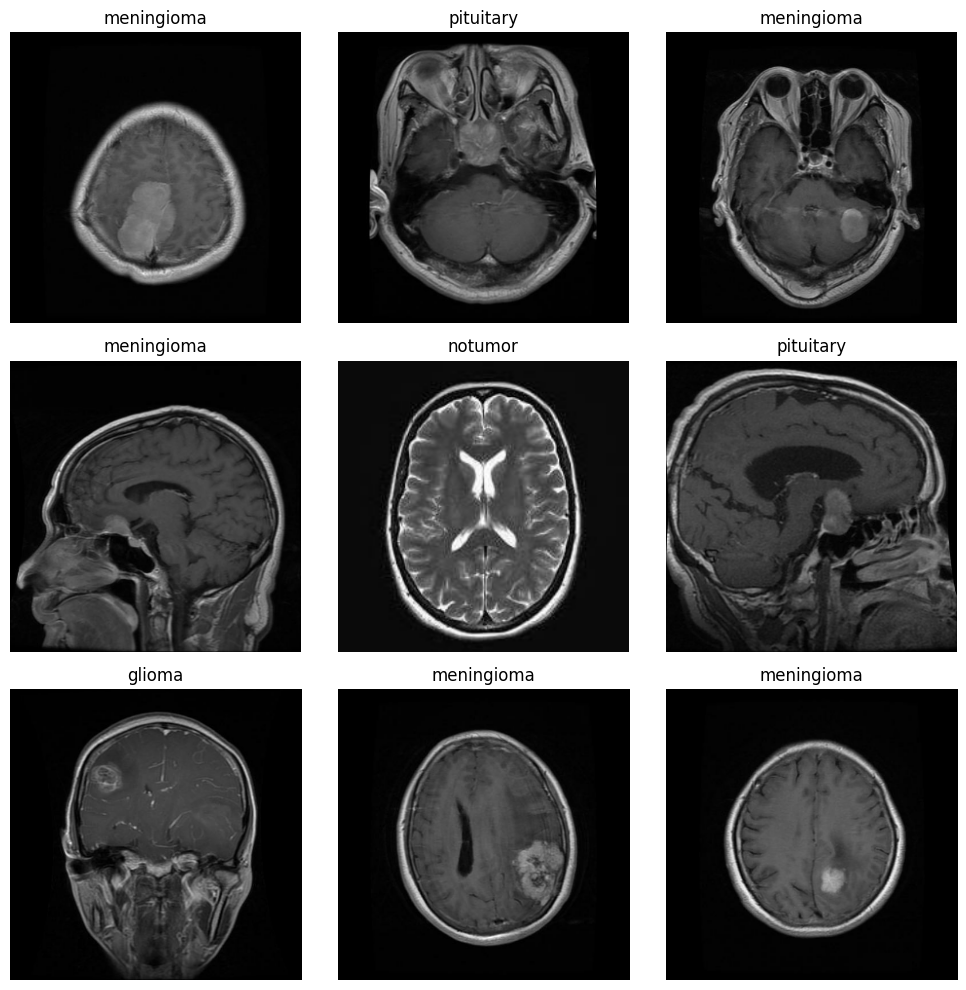

In [71]:
class_names = train_ds.class_names

images, labels = next(iter(train_ds))

print(f"Labels shape: {labels.shape}")
print(f"Sample labels: {labels[:5]}")

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    if len(labels[i].shape) == 0:
        label_index = labels[i].numpy()
    else:
        label_index = tf.argmax(labels[i]).numpy()
    plt.title(class_names[label_index])
    plt.axis("off")
plt.tight_layout()
plt.show()

In [72]:
def one_hot_encode(image, label):
    label = tf.one_hot(label, class_count)
    return image, label

train_ds = train_ds.map(one_hot_encode)
val_ds = val_ds.map(one_hot_encode)

In [73]:
class_count = len(class_names)

img_shape=(299,299,3)
base_model = tf.keras.applications.Xception(include_top= False, weights= "imagenet",
                            input_shape= img_shape, pooling= 'max')

model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate= 0.3),
    Dense(128, activation= 'relu'),
    Dropout(rate= 0.25),
    Dense(class_count, activation= 'softmax')
])

In [74]:
model.compile(Adamax(learning_rate= 0.001),
              loss= 'categorical_crossentropy',
              metrics= ['accuracy',
                        Precision(),
                        Recall()])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dropout_6 (Dropout)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               262272    
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 4)                 516       
                                                                 
Total params: 21124268 (80.58 MB)
Trainable params: 21

In [75]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

In [76]:
history = model.fit(train_ds,
                 epochs=10,
                 validation_data=val_ds,
                 shuffle= False,
                 callbacks=[early_stopping, checkpoint])

Epoch 1/10
352/352 [==============================] - ETA: 0s - loss: 0.2619 - accuracy: 0.9073 - precision_5: 0.9258 - recall_5: 0.8900

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


352/352 [==============================] - 189s 485ms/step - loss: 0.2619 - accuracy: 0.9073 - precision_5: 0.9258 - recall_5: 0.8900 - val_loss: 0.1162 - val_accuracy: 0.9630 - val_precision_5: 0.9649 - val_recall_5: 0.9594
Epoch 2/10
352/352 [==============================] - 161s 455ms/step - loss: 0.0616 - accuracy: 0.9806 - precision_5: 0.9816 - recall_5: 0.9788 - val_loss: 0.0647 - val_accuracy: 0.9793 - val_precision_5: 0.9800 - val_recall_5: 0.9793
Epoch 3/10
352/352 [==============================] - 156s 443ms/step - loss: 0.0277 - accuracy: 0.9913 - precision_5: 0.9913 - recall_5: 0.9911 - val_loss: 0.0790 - val_accuracy: 0.9808 - val_precision_5: 0.9807 - val_recall_5: 0.9786
Epoch 4/10
352/352 [==============================] - 157s 444ms/step - loss: 0.0276 - accuracy: 0.9915 - precision_5: 0.9918 - recall_5: 0.9902 - val_loss: 0.0792 - val_accuracy: 0.9744 - val_precision_5: 0.9764 - val_recall_5: 0.9729
Epoch 5/10
352/352 [==============================] - 162s 458ms/st

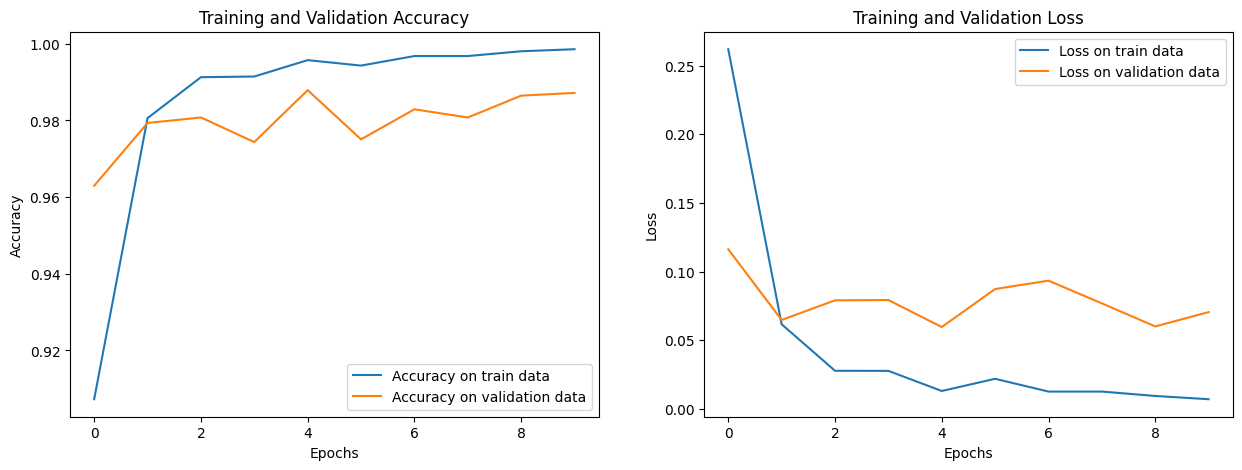

In [77]:
plt.figure(figsize= (15, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label= 'Accuracy on train data')
plt.plot(history.history['val_accuracy'], label= 'Accuracy on validation data')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label= 'Loss on train data')
plt.plot(history.history['val_loss'], label= 'Loss on validation data')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout
plt.show()

In [78]:
model.save('/content/drive/MyDrive/BrainTomurProject101/models2.h5')
model.save('/content/drive/MyDrive/BrainTomurProject101/models2')

In [79]:
train_score = model.evaluate(train_ds, verbose=1)
valid_score = model.evaluate(val_ds, verbose=1)

print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print('-' * 20)
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")

88/88 [==============================] - 10s 113ms/step - loss: 0.0704 - accuracy: 0.9872 - precision_5: 0.9872 - recall_5: 0.9872
Train Loss: 0.0011
Train Accuracy: 99.96%
--------------------
Validation Loss: 0.0704
Validation Accuracy: 98.72%


In [80]:
from tensorflow.keras.models import load_model

# load model
model = load_model('/content/drive/MyDrive/BrainTomurProject101/models2')

1/1 [==============================] - 0s 23ms/step


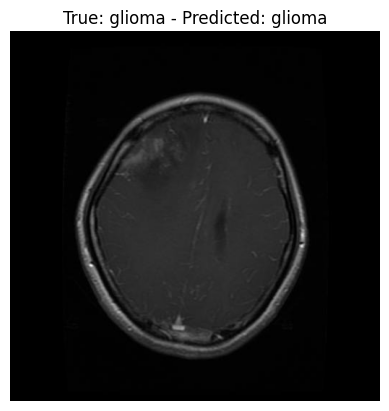

In [92]:
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

image_path = '/content/dataset/glioma/Te-glTr_0002.jpg'
truth_class = os.path.basename(os.path.dirname(image_path))
original_image = cv2.imread(image_path)
image = cv2.resize(original_image, (299, 299))
image = np.expand_dims(image, axis=0)
predict = model.predict(image)
predict_index = np.argmax(predict)
plt.imshow(original_image)
plt.title(f"True: {truth_class} - Predicted: {labels[predict_index]}")
plt.axis('off')
plt.show()